In [1]:
import numpy as np
import pandas as pd

In [2]:
train_path = 'HW1.train.csv'  # path to training data
test_path = 'HW1.test.csv'   # path to testing data

import pandas as pd
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [3]:
train.shape, test.shape

((2000, 95), (500, 94))

In [4]:
df = pd.concat([train,test])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 499
Data columns (total 95 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2500 non-null   int64  
 1   AL                      2500 non-null   int64  
 2   AK                      2500 non-null   int64  
 3   AZ                      2500 non-null   int64  
 4   AR                      2500 non-null   int64  
 5   CA                      2500 non-null   int64  
 6   CO                      2500 non-null   int64  
 7   CT                      2500 non-null   int64  
 8   FL                      2500 non-null   int64  
 9   GA                      2500 non-null   int64  
 10  ID                      2500 non-null   int64  
 11  IL                      2500 non-null   int64  
 12  IN                      2500 non-null   int64  
 13  IA                      2500 non-null   int64  
 14  KS                      2500 non-null   i

In [6]:
df.drop('id', axis = 1, inplace = True)

In [7]:
df.iloc[:,40:].corr().iloc[-1].abs().drop('tested_positive.2').sort_values(ascending = False)[:15]

tested_positive.1     0.991274
tested_positive       0.981751
hh_cmnty_cli          0.892037
hh_cmnty_cli.1        0.891218
hh_cmnty_cli.2        0.889511
nohh_cmnty_cli        0.881381
nohh_cmnty_cli.1      0.880072
nohh_cmnty_cli.2      0.877796
cli.1                 0.849419
cli                   0.848430
cli.2                 0.848244
ili                   0.838876
ili.1                 0.838710
ili.2                 0.836767
worried_finances.2    0.503343
Name: tested_positive.2, dtype: float64

In [8]:
df.iloc[:,40:].iloc[:,18:36].corr().iloc[-1].drop('tested_positive.1').sort_values(ascending = False)[:10]

hh_cmnty_cli.1          0.880158
nohh_cmnty_cli.1        0.869571
cli.1                   0.839502
ili.1                   0.829182
worried_finances.1      0.493290
worried_become_ill.1    0.273047
anxious.1               0.162018
felt_isolated.1         0.102464
depressed.1             0.035889
work_outside_home.1     0.026764
Name: tested_positive.1, dtype: float64

In [9]:
df.iloc[:,40:].iloc[:,:18].corr().iloc[-1].drop('tested_positive').sort_values(ascending = False)[:10]

hh_cmnty_cli          0.881266
nohh_cmnty_cli        0.870784
cli                   0.841828
ili                   0.831756
worried_finances      0.495873
worried_become_ill    0.278948
anxious               0.166837
felt_isolated         0.107500
depressed             0.035488
work_outside_home     0.019607
Name: tested_positive, dtype: float64

In [10]:
state_noinfo = []
state = []
for i in iter(train.iloc[:,1:40]):
    if train[f'{i}'].loc[train[f'{i}'] == 0].shape[0] == 2000:
        state_noinfo.append(i)
    else:
        state.append(i)

In [11]:
df.drop(state_noinfo,axis = 1, inplace = True)

In [12]:
pd.concat([train.iloc[:,1:31], train['tested_positive.2']], axis = 1).corr().iloc[-1].drop('tested_positive.2').sort_values(ascending = False)

MS    0.282766
OK    0.229534
OH    0.218968
NV    0.212388
ID    0.211284
MO    0.205794
NE    0.192174
IA    0.154263
KS    0.108814
AL    0.087203
NC    0.053134
AR    0.050858
NM    0.019281
LA    0.009499
IN   -0.007455
IL   -0.024971
GA   -0.040804
NJ   -0.045719
MN   -0.054292
MI   -0.094814
NY   -0.114213
FL   -0.117198
KY   -0.122338
CO   -0.128983
AK   -0.152517
AZ   -0.162958
CA   -0.214187
MD   -0.215254
CT   -0.234961
MA   -0.278344
Name: tested_positive.2, dtype: float64

In [13]:
cols = ['tested_positive.2',
'tested_positive.1',
'tested_positive',
'hh_cmnty_cli',     
'hh_cmnty_cli.1',   
'hh_cmnty_cli.2',   
'nohh_cmnty_cli',   
'nohh_cmnty_cli.1', 
'nohh_cmnty_cli.2', 
'cli.1',            
'cli',
'ili',
'ili.1',
'ili.2']
cols = sorted(cols)
df = df[cols]

NameError: name 'plt' is not defined

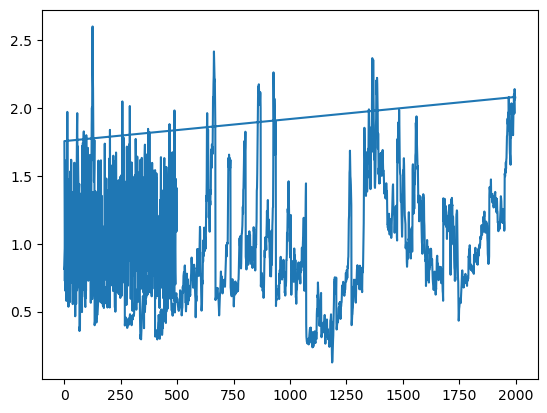

In [14]:
for i in iter(df):
    df[f'{i}'].plot()
    plt.title(i)
    plt.show()

In [23]:
train.iloc[:,58]

0       19.586492
1       20.151838
2       20.704935
3       21.292911
4       21.166656
          ...    
1995    29.736021
1996    30.763206
1997    31.087634
1998    31.449037
1999    32.985559
Name: tested_positive, Length: 2000, dtype: float64